# Lineární modely pro regresi

Lineární modely pro regresi se ve statistice studovaly už v době dlouho před vznikem počítačů, nicméně i dnes mají své místo a v některých případech dokonce dávají lepší výsledky než složitější modely (hlavně tam, kde máme mnoho proměnných a málo instancí). Jejich další výhodou je jednoduchá interpretabilita modelu, z koeficientů lieneárního modelu lze snadno vyčíst, jaký vliv na výsledek mají jednotlivé proměnné. 

Začneme regresními modely. Máme tedy data $(x_i, y_i), 1 \leq i \leq N$, kde $x_i = (x_1, \dots, x_p)$  a budeme hledat koeficienty $\beta_i$ tak, aby model $\hat{y}_i = \beta_0 + \sum_{i=1}^p \beta_ix_i$ co nejlépe odpovídal datům, tzn. budeme minimalizovat $$\mathrm{RSS}=\sum_{i=1}^N(y_i-\hat{y}_i)^2.$$

## Ordinary Least Squares (OLS) + statistické testy

Nejjednodušším spůsobem odhadu parametrů $\beta_i$ je metoda OSL. Pro zjednodušení zápisu budeme uvažovat matici X, která na řádcích obsahuje vektory $(1:x_i)$, tj. $x_i$ před který je přidána jednička (pro koeficient $\beta_0$). RSS se potom dá napsat jako $$\mathrm{RSS}(\beta)=\sum_{i=1}^N(y_i-X\beta)^T(y_i-X\beta).$$ RSS potom můžeme zderivovat podle $\beta$ a dostaneme $$\frac{\partial \mathrm{RSS}}{\partial \beta} = -2X^T(y-X\beta).$$ Hledáme minimum, takže tuto derivaci dáme rovnu 0 a získáme řešení $$\hat{\beta}=(X^TX)^{-1}X^Ty.$$

Zajímavě je, že umíme spočítat i konfidenční itervaly pro  jednotlivé $\beta_i$, a také umíme otestovat, jestli se nějaké konkrétní $\beta_i=0$. To se nám hodí při interpretaci výsledků a také k tomu, abychom proměnné, pro které je koeficient roven nule vyhodili z modelu (protože modelu nejspíš nic nepřidává). Za předpokladu, že pozorování $y_i$ jsou nekorelovaná a mají rozptyl $\sigma$, rozptyly odhadů $$Var(\hat{\beta}_i) = (X^TX)^{-1}\hat{\sigma}^2,$$ $\sigma^2$ se typicky počítá jako $$\hat{\sigma}^2=\frac{1}{N-p-1}\sum_{i=1}^N(y_i-\hat{y}_i)^2.$$ S přídáním dalších předpokladů dostáváme, že $$\beta \sim N(\beta, (X^TX)^{-1}\sigma^2.$$

Pro otestování hypotézy, že $\beta_i=0$ můžeme spočítat tzv. $Z$-skóre $$z_i=\frac{\hat{\beta}_i}{\hat{\sigma}\sqrt{v_i}},$$ kde $v_i$ je $i$-tý prvek na diagonále matice $(X^TX)^{-1}$. Za nulové hypotézy že $\beta_i=0$ má $z_i$ t-rozdělení s $N-p-1$ stupni volnosti a tedy velké hodnoty $z_i$ povedou k zamítnutí této hypotézy.

Zajímat nás také může, co se stane, když z modelu odebereme nějaké proměnné, bude pořád stejně dobrý? Na to u lineárních modelů opět máme dokonce statistický test. K otestování významnosti celé skupiny proměnných se používá tzv. $F$ statistika $$F = \frac{(\mathrm{RSS}_0-\mathrm{RSS}_1)/(p_1-p_0)}{\mathrm{RSS}_1/(N-p_1-1)},$$ kde $\mathrm{RSS}_i$ je RSS modelu $i$ a $p_i$ je počet proměnných modelu $i$. $F$-statistika má $F_{p_1-p_0,N-p_1-1}$ rozdělení.

Vyzkoušejme si nyní natrénovat lineární model na datech a ukažme si něco z výše uvedeného povídání na příkladech. 

In [279]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as fml
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# nacteme data a zobrazime jejich popis
data = sm.datasets.get_rdataset('Boston', 'MASS')
print(data.__doc__)

+----------+-------------------+
| Boston   | R Documentation   |
+----------+-------------------+

Housing Values in Suburbs of Boston
-----------------------------------

Description
~~~~~~~~~~~

The ``Boston`` data frame has 506 rows and 14 columns.

Usage
~~~~~

::

    Boston

Format
~~~~~~

This data frame contains the following columns:

``crim``
    per capita crime rate by town.

``zn``
    proportion of residential land zoned for lots over 25,000 sq.ft.

``indus``
    proportion of non-retail business acres per town.

``chas``
    Charles River dummy variable (= 1 if tract bounds river; 0
    otherwise).

``nox``
    nitrogen oxides concentration (parts per 10 million).

``rm``
    average number of rooms per dwelling.

``age``
    proportion of owner-occupied units built prior to 1940.

``dis``
    weighted mean of distances to five Boston employment centres.

``rad``
    index of accessibility to radial highways.

``tax``
    full-value property-tax rate per \\$10,000.

``p

Natrénujme napřed model na všech datech a podívejme se, jaký vliv mají jednotlivé proměnné na cenu bytů v Bostonu.

In [86]:
all_vars = 'crim+zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+black+lstat'

#zkusime vytvorit model na vsech promennych a vypsat jeho vlastnosti
m1 = fml.ols(formula='medv ~ %s'%all_vars, data=data.data)
res1 = m1.fit()
print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 02 Nov 2015   Prob (F-statistic):          6.72e-135
Time:                        15:04:46   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

Vidíme, že například zvýšení kriminality o jedna snižuje hodnotu domů o cca 100\$ (s tím, že 95-% konfidenční interval je 43-173\$). Také si můžeme všimnout, že proměnné `indus` a `age` nemají na cenu pravděpodobně vliv, protože jejich konfidenční intervaly obsahují nulu (a i hodnota p-hodnota t-test je vysoká). Zkusme se tedy podívat, jestli model bez těchto dvu proměnných pořád bude stejně dobrý jako ten původní.

In [77]:
print(res1.f_test('indus = age = 0'))

<F test: F=array([[ 0.05727398]]), p=0.9443415971005903, df_denom=492, df_num=2>


Není překvapivé, že p-hodnota testu vyšla vysoká a tedy nemáme důkaz pro to, že by menší model byl horší. Zkusme náš menší model teď natrénovat a podívat se na něj trochu blíž.

In [119]:
%matplotlib inline
m2_vars = 'crim+zn+chas+nox+rm+dis+rad+tax+ptratio+black+lstat'

m2 = fml.ols(formula='medv ~ %s'%m2_vars, data=data.data)
res2 = m2.fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Mon, 02 Nov 2015   Prob (F-statistic):          5.54e-137
Time:                        16:13:40   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     36.3411      5.067      7.171      0.0

Lineární regrese počítá s tím, že v datech může být Gaussovský šum, tedy, dobrý model by měl mít rezidua, která se rovnají tomuto šumu a jsou tedy rozdělena normálně, můžeme se podívat na histogram residuí a zkontrolovat, jestli to je pravda, nebo ne.

O trochu lépe než histogram ukazuje shodu rozdělení reziduí a normálního rozdělení tzv. qqplot, který zobrazuje kvantily normálního rozdělení v porovnání s kvatily reziduí. V ideálním případě by body v qqplotu měly ležet v jedné přímce se sklonem 45°.

Rozptyl reziduí by také neměl záviset na hodnotě předpovídané veličiny, to se dá snadno zakreslit v scatterplotu. Residua by samozřejmě také měla být rozdělena rovnoměrně kolem nuly.

Nakonec si ještě zakreslíme skutečné hodnoty vs. předpovězené hodnoty, graf by opět měl mít v ideálním případě všechny body na přímce se sklonem 45°.

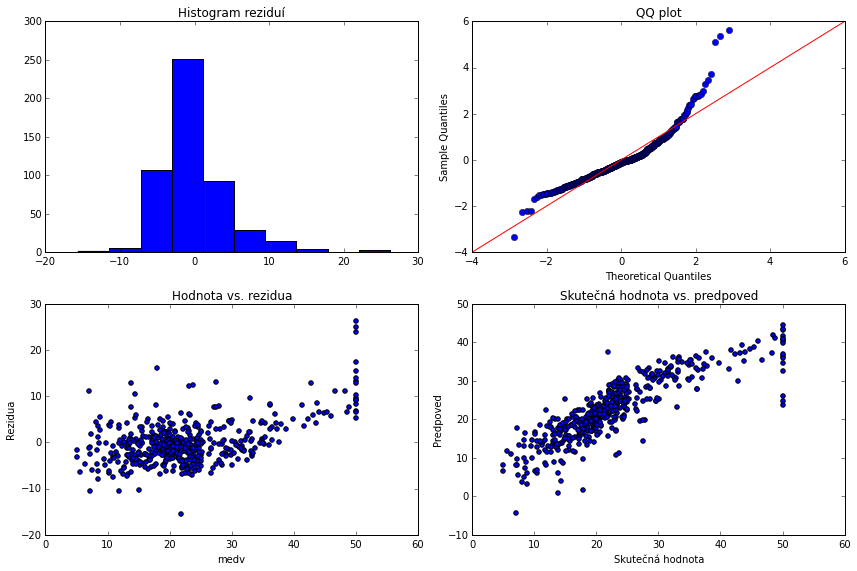

In [280]:
def plot_model_evaluation(res, targets):
    fig = plt.figure(figsize=(12,8))
    
    # histogram rezidui
    ax = plt.subplot(2,2,1)
    ax.hist(res.resid)
    ax.set_title('Histogram reziduí')

    # QQ plot
    ax = plt.subplot(2,2,2)
    _ = sm.qqplot(res.resid, line='45', fit=True, ax=ax)
    ax.set_title('QQ plot')

    # zobrazeni hodnoty vs. chyby (ukazuje, jestli je rozptyl rezidui nezavisly na hodnote)
    ax = plt.subplot(2,2,3)
    ax.scatter(targets, res.resid)
    ax.set_title('Hodnota vs. rezidua')
    ax.set_xlabel('medv')
    ax.set_ylabel('Rezidua')

    # zobrazeni predpovedi proti hodnote
    ax = plt.subplot(2,2,4)
    ax.scatter(targets, res.fittedvalues)
    ax.set_title('Skutečná hodnota vs. predpoved')
    ax.set_xlabel('Skutečná hodnota')
    ax.set_ylabel('Predpoved')

    plt.tight_layout()
    plt.show()
    
plot_model_evaluation(res2, data.data['medv'])

Vidíme, že náš model úplně nesplňuje předpoklady dobrého modelu (to ale ještě neznamená, že ho nemůžeme úspěšně používat). Zkusme ho trochu vyladit. Vidíme, že rezidua jsou vetší, čím větší je skutečná hodnota, navíc předpovídáme cenu, která může mít relativně velké rozpětí. V takových případech se může hodit místo ceny předpovídat logaritmus ceny. Zkusme, co náš model udělá, když ho takto upravíme.

                            OLS Regression Results                            
Dep. Variable:           np.log(medv)   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     168.1
Date:                Mon, 02 Nov 2015   Prob (F-statistic):          4.31e-159
Time:                        16:13:44   Log-Likelihood:                 129.02
No. Observations:                 506   AIC:                            -234.0
Df Residuals:                     494   BIC:                            -183.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      4.0837      0.203     20.112      0.0

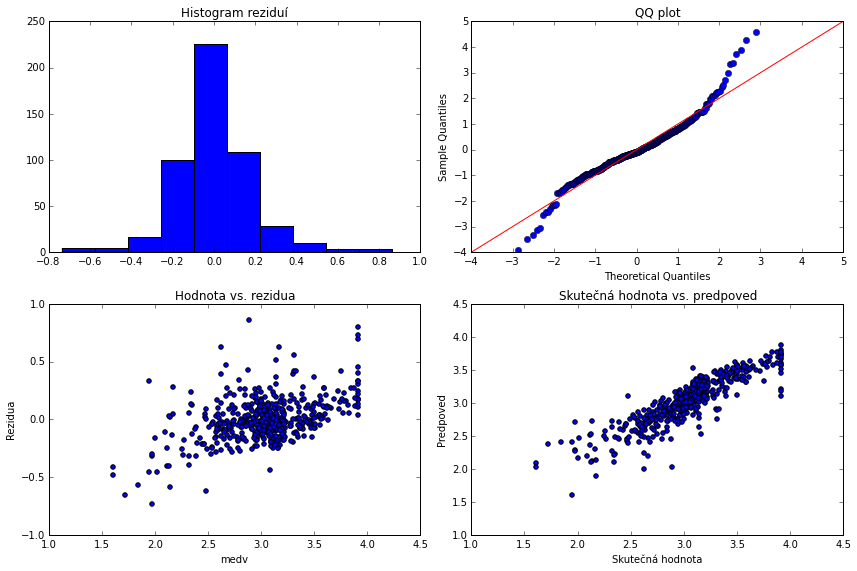

In [121]:
m3_vars = 'crim+zn+chas+nox+rm+dis+rad+tax+ptratio+black+lstat'

m3 = fml.ols(formula='np.log(medv) ~ %s' % m3_vars, data=data.data)
res3 = m3.fit()
print(res3.summary())
plot_model_evaluation(res3, np.log(data.data['medv']))

Minimálně z hledika reziduí se model teď tváří o něco lépe, porovnat přesnost obou modelů přímo z výpisů nejde, protože předpovídáme něco jiného, ale můžeme si u obou zkusit spočítat, jaké mají střední čtvercové chyby. Uvidíme, že model předpovídající logaritmus ceny je o trochu lepší.

In [129]:
resid2 = data.data['medv']-res2.fittedvalues
err2 = np.sqrt(sum(resid2**2)/len(resid2))
resid3 = data.data['medv']-np.exp(res3.fittedvalues)
err3 = np.sqrt(sum(resid3**2)/len(resid3))

print('Model 2: %.3f' % err2)
print('Model 3: %.3f' % err3)

Model 2: 4.680
Model 3: 4.315


Podívejme se, jestli ještě nemůžeme z modelu odstranit nějaké další proměnné. To můžeme zjistit například tak, že zkusíme pomocí F-testu, jak dopadne model, ze kterého odebereme jednu proměnnou, jestli se bude nějak výrazně lišit od našeho původního modelu.

In [154]:
for i in range(len(res3.params)):
    name = res3.model.exog_names[i]
    print('%s: %.5f' % (name, res3.f_test('%s = 0' % name).pvalue))

Intercept: 0.00000
crim: 0.00000
zn: 0.04531
chas: 0.00224
nox: 0.00000
rm: 0.00000
dis: 0.00000
rad: 0.00000
tax: 0.00004
ptratio: 0.00000
black: 0.00013
lstat: 0.00000


To, že nám hodnoty testu vyšly stejně jako v tabulce výše není náhoda, bude to tak vždy. Hodnoty v tabulce vlastně vyjadřují přesně výsledek testu po odebrání té dané hodnoty. Zkusme ale přecijen odebrat proměnnou, která má nejmenší vliv a je blízko hranici 5% významnosti testu, tedy `zn`.

                            OLS Regression Results                            
Dep. Variable:           np.log(medv)   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     183.4
Date:                Mon, 02 Nov 2015   Prob (F-statistic):          2.28e-159
Time:                        16:33:51   Log-Likelihood:                 126.96
No. Observations:                 506   AIC:                            -231.9
Df Residuals:                     495   BIC:                            -185.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      4.1001      0.204     20.148      0.0

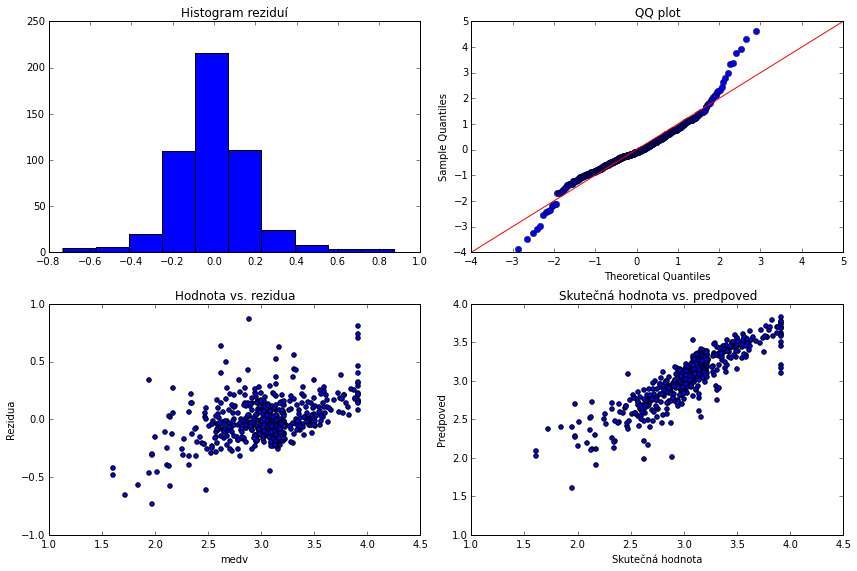

In [155]:
m4_vars = 'crim+chas+nox+rm+dis+rad+tax+ptratio+black+lstat'

m4 = fml.ols(formula='np.log(medv) ~ %s' % m4_vars, data=data.data)
res4 = m4.fit()
print(res4.summary())
plot_model_evaluation(res4, np.log(data.data['medv']))

Změna v kvalitě modelu se zdá minimální, ale model je o proměnnou jednodušší, takže může lépe zobecňovat. Ukázali jsme vlastně první krok jednoho z algoritmů na výběr proměnných. Pokud bych chtěli počet proměnných ještě dále snižovat, bylo by přirozené odebrat znovu proměnnou z nejmenším vlivem, tj. v tomto případě `chas`.

Postupů po výbšr proměnných v lineární regresi je více, samozřejmě můžeme vyzkoušet všechny podmnožiny množiny proměnných (to se díky různým trikům dá stihnout pro množiny do velikosti cca 40 prměnných), případně můžeme začít (jako výše) s modelem ze všech proměnných a ubírat ty nejméně důležité, nebo naopak začít s konstatním modelem a přidávat proměnné, které model nejvíce zlepší. Jednou z možností je také začít s konstatním modelem a přidávat proměnné, které mají největší korelaci s rezidui předchozího modelu.

## Regularizace

Další možností, jak zlepšit kvalitu modelu je regularizace, tj. penalizace modelů, které mají velké hodnoty koeficientů. To nutí model dávat nižší hodnoty koeficientům, které nejsou důležité. V ideálním případě by se nám líbilo, kdyby takové koeficienty dostaly rovnou hodnotu 0.

### Ridge regression a lasso regression

Často používaná metoda regularizace je tzv. ridge regression. U té se místo RSS optimalizuje hodnota $$ \mathrm{RSS} + \lambda\sum_{i=1}^p\beta_i^2.$$ Pomocí parametru $\lambda$ se dá nastavovat poměr mezi regularizací a optimalizací RSS. Při větších hodnotách $\lambda$ se dává větší důraz na regularizaci. Všimněme si, že v regularizačním členu chybí $\beta_0$. Zajímavé je, že když projedeme odvození odhadu $\hat{\beta}$ pro regresi ale vložíme do něj vzorec pro ridge regresi, dostaneme velmi podobnou rovnici $$\hat{\beta}=(X^TX + \lambda I)^{-1}X^Ty.$$ Tím, že se k diagonále matice $X^TX$ přičte kladné číslo zajistíme, že matice bude vždy regulární (to v případě normalní regrese platit nemuselo) a tudíž vypočtené řešení bude unikátní. Toto byla původně hlavní motivace pro ridge regresi.

Na první pohled velmi podobnou metodou je lasso regression, ta se od ridge regression liší jen v tom, že místo druhé mocniny má v regularizačním členu absolutní hodnotu (je to tzv. $L_1$ regularizace, ridge regression je $L_2$). Tedy, v lasso regression se optimalizuje $$\mathrm{RSS} + \lambda\sum_{i=1}^p|\beta_i|$$. 

Ačkoliv jsou obě metody velmi podobné, je mezi nimi jeden zásadní rozdíl, a ten je v tom, že lasso regrese umí nastavit některé koeficienty na 0 a tím vlastně dělá zároveň výběr proměnných. Na to, abysme si uvědomili proč to tak je, se nám hodí následující příklad. Podívejme se napřed, jak se mění RSS lineárního modelu dvou proměnných, když meníme hodnoty $\beta$.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.280e+05
Date:                Mon, 02 Nov 2015   Prob (F-statistic):           1.07e-93
Time:                        18:55:27   Log-Likelihood:                 80.754
No. Observations:                  50   AIC:                            -157.5
Df Residuals:                      48   BIC:                            -153.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.5029      0.005    313.850      0.0

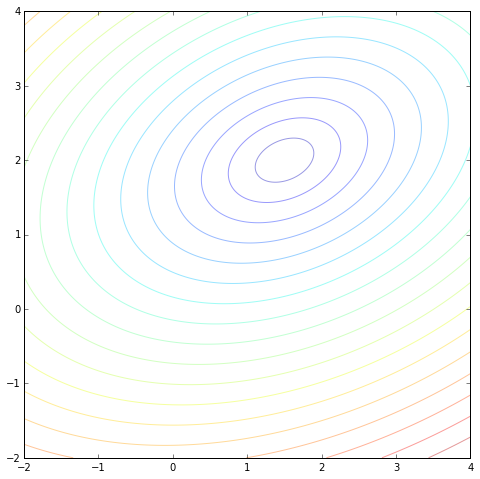

In [221]:
np.random.seed(1234)

# vytovorime hodne jednoducha data pro regresi (2 promenne)
x = np.linspace(1, 2)
y = np.linspace(-4, 2)
z = 1.5*x+2*y+0.05*np.random.randn(len(x))

X = np.array(list(zip(x, y)))

# zkusime natrenovat model a podivat se, jestli se trefil
res4 = sm.OLS(z, X).fit()
print(res4.summary())

# zakreslime chybu modelu v zavislosti na koeficientech
def compute_error(beta, X, z):
    return np.sqrt(sum((np.dot(X, beta)-z)**2))

plt.figure(figsize=(8,8))
XX = np.linspace(-2, 4, 500)
YY = np.linspace(-2, 4, 500)
XXX, YYY = np.meshgrid(XX, YY)
betas = np.array([XXX.ravel(), YYY.ravel()]).T 
Z = np.array(list(map(lambda x: compute_error(x, X, z), betas)))
Z = Z.reshape(XXX.shape)

plt.contour(XXX, YYY, Z, levels=np.linspace(np.min(Z), np.max(Z), 20), alpha=0.4)
plt.show()

To, že chyba "dělá elipsy" není samozřejmě náhoda, RSS je kvadratická fuknce proměnných $\beta$. Co to ale znamená pro rozdíl mezi ridge a lasso regresí? Problém z ridge regression se dá ekvivalentně přepsat jako minimalizace RSS za podmínky $\sum_{i=1}^p\beta_i^2\leq t$ pro nějaké $t$. Podobně optimalizace z lasso regression se dá zapsat jako minimalizace RSS za podmínky $\sum_{i=1}^p|\beta_i|\leq t$ pro nějaké $t$. Jak tedy vypadají oblasti, ve kterých hledáme minimum vzhledem k hodnotám $\beta$? U ridge regrese je to kruh s poloměrem $\sqrt{t}$ u lasso regrese to je čtverec s vrcholy na osách grafu v bodech $[\pm t, 0]$ a $[0, \pm t]$. Právě ostré rohy v případě lasso regrese vedou k tomu, že minimum se častěji vyskytuje přesně v místě, kde jeden nebo více z parametrů $\beta$ je nula. Ve vyšších dimenzích vypadají útvary podobně, v případě lasso regrese je ostrých hran mnohem více a v souvislosti s tím roste i možnost, že některý z parametrů vypadne. 

Samozřejmě teoreticky můžeme ridge regresi i lasso regresi zobecnit a použít obecně $L_p$ regularizaci, pro $p$ mezi 0 a 1 dostáváme nekonvexní oblast, což zesložiťuje optimalizaci, ale zvyšuje pravděpodobnost, že některý z paramtrů vypadne. 

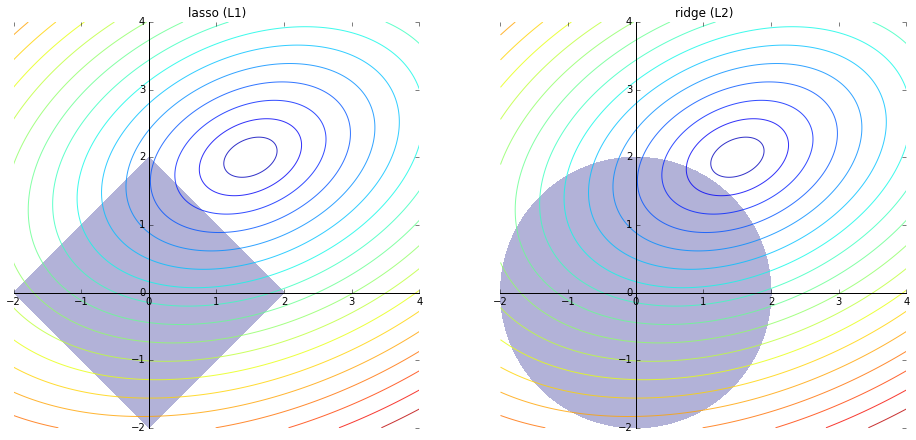

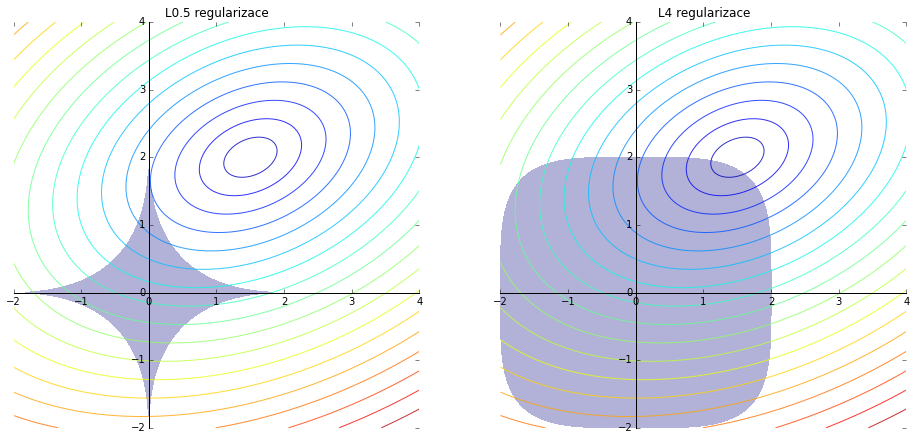

In [222]:
# jednotlive regularizacni termy, konstanty na konci jsou tak, aby protinaly osy v +-2
Z_lasso = np.abs(betas[:,0])+np.abs(betas[:,1]) - 2
Z_ridge = betas[:, 0]**2 + betas[:, 1]**2 - 4
Z_L05 = np.abs(betas[:, 0])**0.5 + np.abs(betas[:, 1])**0.5 - np.sqrt(2)
Z_L4 = betas[:, 0]**4 + betas[:, 1]**4 - 16

plt.figure(figsize=(16, 16))
ax = plt.subplot(2,2,1)
ax.contour(XXX, YYY, Z, levels=np.linspace(np.min(Z), np.max(Z), 20), alpha=0.8)
ax.contourf(XXX, YYY, Z_lasso.reshape(XXX.shape), levels=[-np.inf, 0], alpha=0.3)
ax.set_aspect(1)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.set_title('lasso (L1)')

ax = plt.subplot(2,2,2)
ax.contour(XXX, YYY, Z, levels=np.linspace(np.min(Z), np.max(Z), 20), alpha=0.8)
ax.contourf(XXX, YYY, Z_ridge.reshape(XXX.shape), levels=[-np.inf, 0], alpha=0.3)
ax.set_aspect(1)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.set_title('ridge (L2)')

plt.figure(figsize=(16, 16))
ax = plt.subplot(2,2,1)
ax.contour(XXX, YYY, Z, levels=np.linspace(np.min(Z), np.max(Z), 20), alpha=0.8)
ax.contourf(XXX, YYY, Z_L05.reshape(XXX.shape), levels=[-np.inf, 0], alpha=0.3)
ax.set_aspect(1)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.set_title('L0.5 regularizace')

ax = plt.subplot(2,2,2)
ax.contour(XXX, YYY, Z, levels=np.linspace(np.min(Z), np.max(Z), 20), alpha=0.8)
ax.contourf(XXX, YYY, Z_L4.reshape(XXX.shape), levels=[-np.inf, 0], alpha=0.3)
ax.set_aspect(1)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.set_title('L4 regularizace')

plt.show()

Jak dopadne ridge regrese a lasso regrese na našich datech? Budeme opět předpovídat logaritmus ceny. Pro ridge a lasso regresi musíme použít scikit-learn, statsmodels ji (zdá se) neumí. Zakreslíme si, jak se mění hodnoty parametrů v závislosti na velikosti regularizačního parametru.

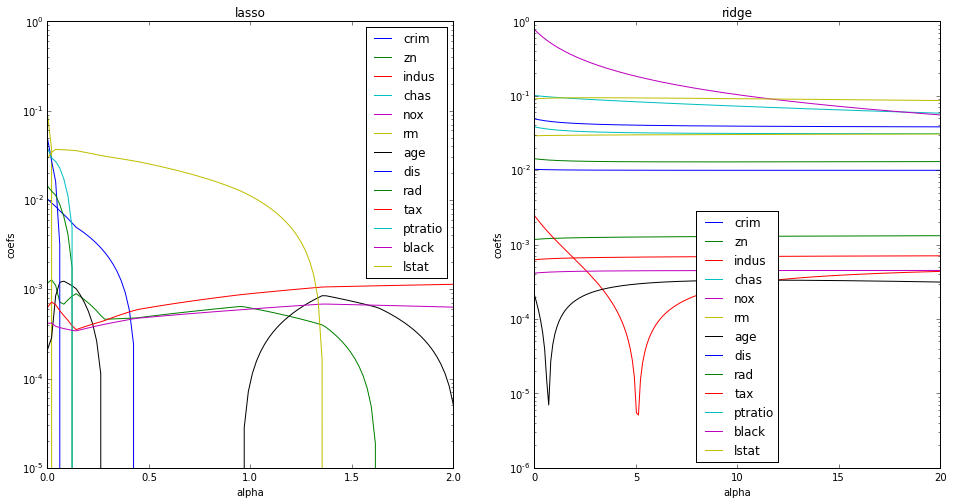

In [292]:
from sklearn import linear_model
import pandas as pd

train_y = np.log(data.data['medv'])
train_X = data.data.drop('medv', axis=1)

alphas = np.linspace(0, 2, 100)+0.000001
coefs_lasso = pd.DataFrame(columns=train_X.columns, index=alphas)
for alpha in alphas:
    lasso = linear_model.Lasso(alpha=alpha)
    lasso.fit(train_X, train_y)
    coefs_lasso.loc[alpha] = np.abs(lasso.coef_)    

alphas = np.linspace(0, 20, 200)+0.000001
coefs_ridge = pd.DataFrame(columns=train_X.columns, index=alphas)
for alpha in alphas:
    ridge = linear_model.Ridge(alpha=alpha)
    ridge.fit(train_X, train_y)
    coefs_ridge.loc[alpha] = np.abs(ridge.coef_)
    
fig = plt.figure(figsize=(16,8))
ax = plt.subplot(1,2,1)
coefs_lasso.plot(ax=ax)
ax.set_yscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('coefs')
ax.set_title('lasso')

ax = plt.subplot(1,2,2)
coefs_ridge.plot(ax=ax)
ax.set_yscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('coefs')
ax.set_title('ridge')
plt.show()

### Elastic net

Zajímavý kompromis mezi lasso regresí a ridge regresi je elastic net regrese, ta kombinuje oba přistupy tím, že sčítá oba regularizační členy. Minimalizuje se tedy $$\mathrm{RSS}+\sum_{i=1}^p|\beta_i| + \sum_{i=1}^p\beta_i^2$$. Tento způsob zachovává ostré hrany z lasso a navíc obsahuje konvexní části z ridge regrese.

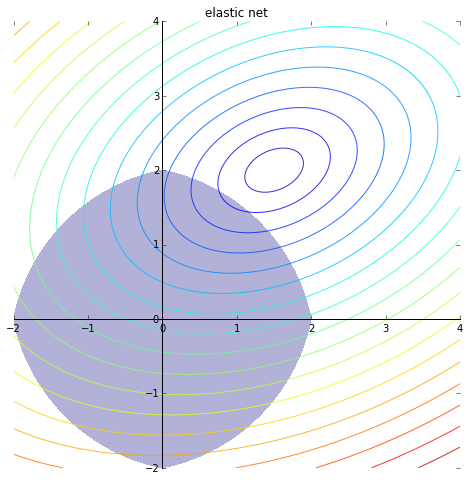

In [278]:
Z_elastic_net = np.abs(betas[:,0])+np.abs(betas[:,1]) +betas[:,0]**2 + betas[:, 1]**2 - 6

plt.figure(figsize=(8, 8))
ax = plt.subplot(1,1,1)
ax.contour(XXX, YYY, Z, levels=np.linspace(np.min(Z), np.max(Z), 20), alpha=0.8)
ax.contourf(XXX, YYY, Z_elastic_net.reshape(XXX.shape), levels=[-np.inf, 0], alpha=0.3)
ax.set_aspect(1)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.set_title('elastic net')
plt.show()